**Neural Network untuk Klasifikasi**

Dalam neural network untuk deteksi, kita perlu mendeteksi sebuah pola ada atau tidak. Untuk tugas klasifikasi, kita memilih kelas-kelas pola, dan kita tahu bahwa sebuah pola dari dalah satu kelas harus ada. Jaringan harus memutuskan kelas mana yang sesuai. Salah satu aplikasi klasiknya adalah klasifikasi angka tulisan tangan. Input jaringan adalah gambar angka tulisan tangan, dan setiap gambar termasuk ke dalam salah satu dari 10 kelas, yaitu angka 0 hingga 9.

Jaringan biasanya memiliki output sama dengan jumlah kelas dan setiap output mungkin mewakili probabilitas bahwa gambar pada input jaringan termasuk ke dalam kelas yang sesuai. Karena kita tahu bahwa harus salah satu dari 10 digit itu, probabilitas harus saling menamkan hingga 1.

Salah satu database klasik untuk contoh ini adalah database MNIST (Modified NationalInstitute of Standards and Technology database). Database ini berisi 60.000 gambar grayscale dari tulisan tangan dengan ukuran 28x28 pixel.

Setelah memuat data menggunakan train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(..)) untuk memuat set pelatihan dengan 100 gambar acak dan kelas target, serta sebuah set uji dengan 10 gambar acak dan kelas target.

Setelah memuat dan membaca set pelatihan dengan fungsi next(..), kita dapat memeriksa jenis data yang dihasilkan dengan pernyataan print dan dengan menggunakan fungsi .type(): print("X_train.type()=", X_train.type(), "y_train.type()=", y_train.type())

Kita akan mendapatkan keluaran X_train.type()= torch.FloatTensor y_train.type()=torch.LongTensor.

Perhatikan bahwa sinyal input, yaitu gambar, memiliki jenis torch.FloatTensor, sedangkan target, yaitu indeks kelas digit yang benar, memiliki jenis torch.LongTensor! Perbedaan ini dalam jenis data menjadi penting ketika kita menerapkan fungsi kerugian (loss function).

X_train.type()= torch.FloatTensor y_train.type()= torch.LongTensor
batch_idx= 0 X_train.shape= torch.Size([100, 1, 28, 28]) y_train.shape= torch.Size([100]) y_train= tensor([2, 9, 1, 1, 8, 2, 4, 7, 0, 0, 6, 7, 4, 8, 2, 5, 1, 4, 2, 1, 8, 2, 5, 0,
        3, 7, 8, 4, 9, 6, 1, 6, 0, 6, 5, 8, 9, 4, 5, 7, 0, 6, 5, 2, 1, 4, 8, 3,
        8, 5, 7, 1, 6, 9, 9, 3, 3, 3, 3, 8, 6, 2, 6, 7, 6, 3, 8, 1, 5, 3, 3, 0,
        8, 9, 2, 6, 2, 4, 2, 2, 7, 1, 0, 1, 9, 0, 8, 2, 1, 1, 1, 8, 7, 7, 9, 5,
        2, 9, 7, 1])


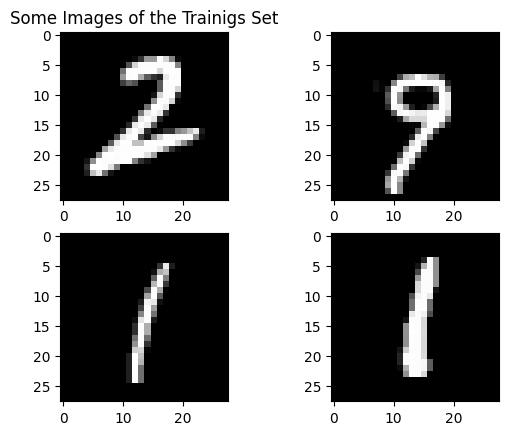

X_train.shape= torch.Size([100, 784])
X_test.shape= torch.Size([10, 784])
Generate Model:
0 2.3243284225463867
2 1.2144628763198853
4 0.6145825982093811
6 0.31463396549224854
8 0.15887002646923065
Duration of optimization: 0.10939693450927734
Loss on the test set: tensor(0.8291, grad_fn=<NllLossBackward0>)
Wrote to mnistexample_pytorch_weights.torch
sample.shape= torch.Size([784])
Test Ypred= tensor([ 1.1738, -5.3298, -2.6563, -1.6222,  0.5433, -1.5074, -2.4969,  5.0286,
         0.5185,  4.1328], grad_fn=<ViewBackward0>)
prediction= tensor(7)


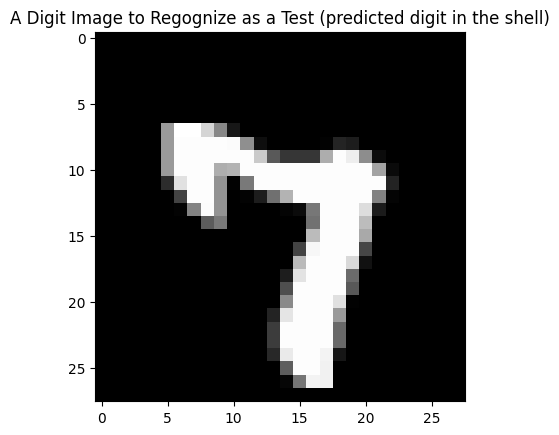

X_train.type()= torch.FloatTensor y_train.type()= torch.LongTensor
batch_idx= 0 X_train.shape= torch.Size([100, 1, 28, 28]) y_train.shape= torch.Size([100]) y_train= tensor([6, 0, 9, 7, 1, 0, 4, 9, 4, 7, 7, 5, 7, 1, 2, 9, 7, 4, 3, 7, 8, 1, 4, 1,
        7, 0, 7, 4, 0, 7, 6, 2, 3, 6, 7, 9, 9, 5, 1, 2, 1, 4, 1, 4, 1, 2, 8, 1,
        2, 9, 3, 2, 9, 2, 1, 2, 3, 2, 5, 2, 4, 1, 1, 7, 6, 7, 8, 1, 5, 9, 2, 3,
        3, 2, 9, 1, 6, 2, 2, 7, 7, 7, 9, 4, 9, 6, 9, 2, 4, 5, 9, 3, 3, 8, 0, 4,
        6, 4, 2, 6])


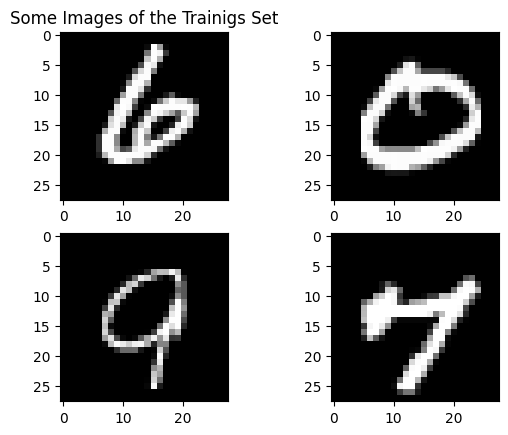

X_train.shape= torch.Size([100, 784])
X_test.shape= torch.Size([10, 784])
Generate Model:
0 2.236313819885254
2 1.136823296546936
4 0.5690064430236816
6 0.2917332649230957
8 0.15442229807376862
Duration of optimization: 0.10384988784790039
Loss on the test set: tensor(1.1845, grad_fn=<NllLossBackward0>)
Wrote to mnistexample_pytorch_weights.torch
sample.shape= torch.Size([784])
Test Ypred= tensor([ 7.4897, -8.5679,  1.5368, -1.0728, -2.9148,  0.0339, -0.6238, -1.0195,
        -1.6090, -0.4897], grad_fn=<ViewBackward0>)
prediction= tensor(0)


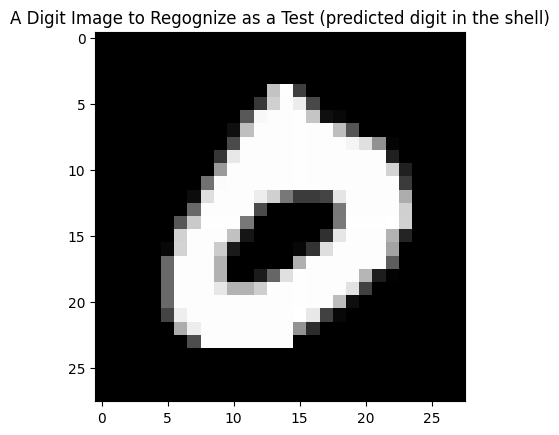

In [ ]:
#from: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
#https://pytorch.org/docs/stable/torchvision/datasets.html#mnist
#Translated to PyTorch and modified to a simple fully connected network,
#by Gerald Schuller, October 2019

import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import time

device='cpu'
#device='cuda'

# define the neural network model
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.layer1=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_pixels))
        self.layer2=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_classes))


    def forward(self, x):
        x = F.relu(self.layer1(x))  #First layer with activation function
        x = self.layer2(x)   #Second layer
        #x = torch.nn.Softmax(x)
        return x



batch_size_train = 100
batch_size_test = 10
num_classes = 10  #10 classes according to the 10 possible digits 0,...,9

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/',
    train=True, download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_train, shuffle=True)
#the Normalize() arguments are mean and standard deviation.

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/',
                               train=False, download=True,
                               transform=torchvision.transforms.Compose(
                                   [torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_test, shuffle=True)


examples = enumerate(train_loader)
# Plot ad hoc mnist instances

# load (downloaded if needed) the MNIST dataset
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#one batch of 100 images:
batch_idx, (X_train, y_train) = next(examples)
print( "X_train.type()=",X_train.type(), "y_train.type()=",y_train.type())
print("batch_idx=", batch_idx, "X_train.shape=", X_train.shape, "y_train.shape=", y_train.shape, "y_train=", y_train)
examples = enumerate(test_loader)
#one batch of 100 images:
batch_idx, (X_test, y_test) = next(examples)

# plot 4 images as gray scale
plt.subplot(221)
plt.title("Some Images of the Trainigs Set")
plt.imshow(X_train[0,0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1,0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2,0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3,0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


X_testunflat=X_test.clone() #keep original for imshow later
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[2] * X_train.shape[3]


#Flatten the images:
X_train = X_train.view(X_train.shape[0], num_pixels)
print("X_train.shape=",X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("X_test.shape=",X_test.shape)

# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255

# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)


# build the model
print("Generate Model:")
model = DenseNet()#.to('cpu')

loss_fn = nn.CrossEntropyLoss()
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

# Fit the model
X_train=X_train.to(device)
y_train=y_train.to(device)
starttime=time.time()
for epoch in range(10):
    Ypred=model(X_train)
    loss=loss_fn(Ypred, y_train)
    if epoch%2==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

endtime=time.time()
print("Duration of optimization:", endtime-starttime)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200, verbose=2)
# Final evaluation of the model
Ypred=model(X_test)
loss=loss_fn(Ypred, y_test)
#scores = model.forward(X_test, y_test, verbose=0)
print("Loss on the test set:", loss)

torch.save({'model_state_dict': model.state_dict(),
       'optimizer_state_dict': optimizer.state_dict()}, "mnistexample_pytorch_weights.torch")
print("Wrote to mnistexample_pytorch_weights.torch")


#"Inference", predict an example digit test image:
plt.imshow(X_testunflat[1,0], cmap=plt.get_cmap('gray'))
plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

sample=X_test[1,:]
print("sample.shape=", sample.shape)
Ypred=model(sample)
print("Test Ypred=", Ypred)
prediction=torch.argmax(Ypred) #use argmax as the class with the largest output
print("prediction=", prediction)

plt.show()
